# Machine Learning Project1

In this project, you will learn to use the concepts we have seen in the lectures and practiced in the labs on a real-world dataset, start to ﬁnish. You will do exploratory data analysis to understand your dataset and your features, do feature processing and engineering to clean your dataset and extract more meaningful information, implement and use machine learning methods on real data, analyze your model and generate predictions using those methods and report your ﬁndings.

## Load and Clean Data

For raw data, firstly, we need to check what conponent it has and how can we deal with it. So we import panda library to have a quick view of train dataset.

In [1]:
import pandas as pd
import numpy as np

from proj1_helpers import *
from implementations import *

%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload

In [22]:
tt = pd.read_csv("train.csv")
tt.head(10)


,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,...,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,...,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,...,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


In [3]:
tt.shape

(250000, 32)

In [26]:
tt["PRI_jet_subleading_phi"][:10]

0     -2.475
1   -999.000
2   -999.000
3   -999.000
4   -999.000
5      3.106
6     -2.767
7   -999.000
8   -999.000
9   -999.000
Name: PRI_jet_subleading_phi, dtype: float64

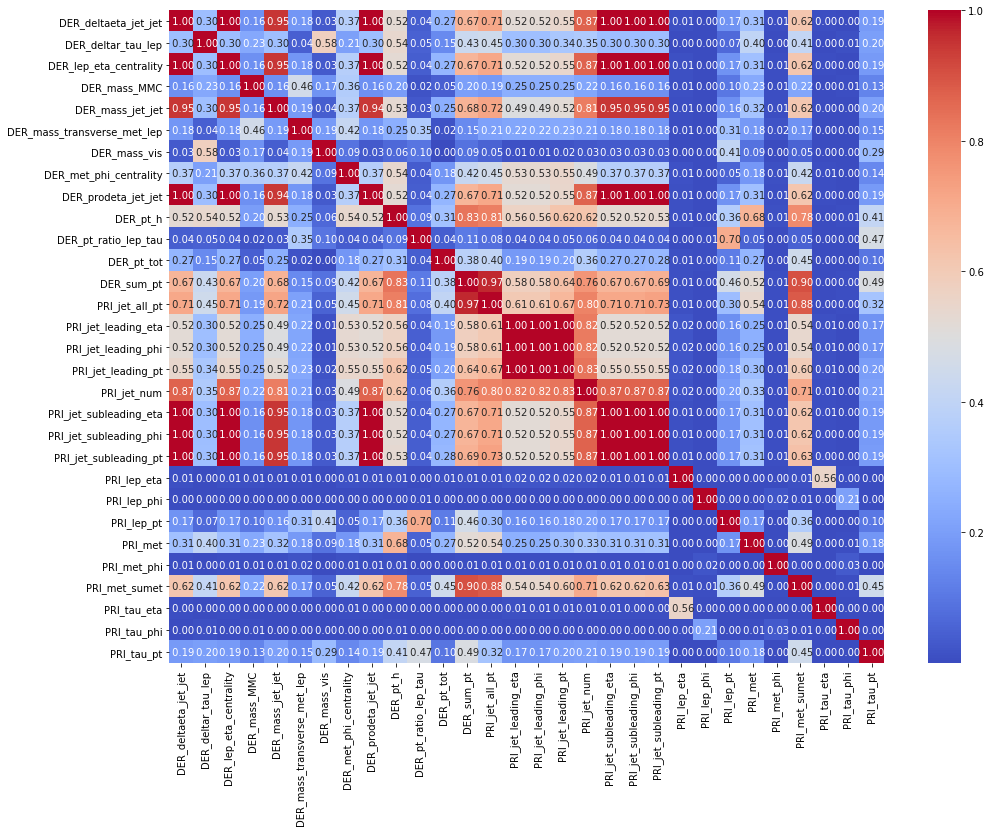

In [30]:
df = tt[tt.columns.difference(['Id', 'Prediction'])]
correlation_matrix = df.corr().abs() # Correlation matrix


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix,cbar=True,fmt =' .2f', annot=True, cmap='coolwarm')

In [38]:
# print(tt.columns.get_loc("DER_lep_eta_centrality") - 2)
# print(tt.columns.get_loc("DER_prodeta_jet_jet") - 3)
# print(tt.columns.get_loc("PRI_jet_subleading_eta") - 2)
# print(tt.columns.get_loc("PRI_jet_subleading_phi") - 2)
# print(tt.columns.get_loc("PRI_jet_subleading_pt") - 2)

print(tt.columns.get_loc("DER_lep_eta_centrality"))
print(tt.columns.get_loc("DER_prodeta_jet_jet"))
print(tt.columns.get_loc("PRI_jet_subleading_eta"))
print(tt.columns.get_loc("PRI_jet_subleading_pt"))
# print(tt.columns.get_loc("DER_prodeta_jet_jet"))
# tt.columns[[6,7,8,14,25,26,27,28,29,30]]

14
8
29
28


In [32]:
# Gives the set of features and how correlated they are with each other
# So maybe we can remove the columns and see how they work out - need to decide which ones to remove
correlation_matrix.where(np.triu(correlation_matrix, 1) >= 0.98).stack().reset_index()

,level_0,level_1,0
0,DER_deltaeta_jet_jet,DER_lep_eta_centrality,0.999998
1,DER_deltaeta_jet_jet,DER_prodeta_jet_jet,0.999981
2,DER_deltaeta_jet_jet,PRI_jet_subleading_eta,0.999995
3,DER_deltaeta_jet_jet,PRI_jet_subleading_phi,0.999996
4,DER_deltaeta_jet_jet,PRI_jet_subleading_pt,0.999346
5,DER_lep_eta_centrality,DER_prodeta_jet_jet,0.999990
6,DER_lep_eta_centrality,PRI_jet_subleading_eta,0.999997
7,DER_lep_eta_centrality,PRI_jet_subleading_phi,0.999998
8,DER_lep_eta_centrality,PRI_jet_subleading_pt,0.999355
9,DER_prodeta_jet_jet,PRI_jet_subleading_eta,0.999988


In [ ]:
import missingno as msno
msno.matrix(tt.replace(-999,np.nan))

In [ ]:
msno.matrix(tt.replace(0,np.nan))

In [ ]:
msno.heatmap(tt.replace(-999,np.nan))

Through observing the dataset, we find out that there are some positive columns has a large number of -999 which should be NaN actually. Specially, in one column called 'PRI_jet_all_pt', 0 value present quite frequently. All these situation above could be trated as the missing values and we should give a reaonable solution.

Here are some plans: 
1. Remove columns containing missing value. But we will lose tons of potential data.
2. Replace them with 0 or -1. But it is a quite dangerous method because the model could possiblely take it as real value
3. Replace the missing values with mean, median or mode. For numerical values, go with mean, and if there are some outliers try median (since it is much less sensitive to them).

The third plan is a standard and often very good approach. So we are going to replace -999 by the mean of other data in same column. And the percentage of 0 value is not high, thus, we think these are real data point.

In [ ]:
#load train dataset
y, x, ids = load_csv_data("train.csv")

In [ ]:
#replace mising value by mean
for column in range(x.shape[1]):
    x[:, column] = replace_nan(x[:, column], -999)
    
# Standardizing it by features
x, _, _ = standardize(x) 
pd.DataFrame(x).head()

## Prepare Data and Basic Training

We use the cell below to control all the parameters we need, so that all processes could be easy to adjust.

In [ ]:
#build polynomial by degree
degree = 1
#split train dataset to 2 parts for test and train
ratio_split = 0.8
#L2 penalty parameter for ridge_regression()
lambda_ = 0.1
#GD
max_iters_GD = 100
gamma_GD = 0.05
#SGD
max_iters_SGD = 100
gamma_SGD = 0.005

__Build Polinomial and Split Data to train and test sets__

In [ ]:
x = build_log(x)
x = build_combination(x, 2)
x_ = build_poly(x, degree)
x_train, x_test, y_train, y_test = split_data(x_, y, ratio_split)

In [ ]:
print('The size of x_train: {}\nThe size of x_test: {}'.format( x_train.shape, x_test.shape))

__Test the functions in implements.py__

In [ ]:
# least_squares()
w, loss = least_squares(y_train, x_train)
print(loss, compute_loss(y_test, x_test, w))

In [ ]:
# ridge_regression()
w, loss = ridge_regression(y_train, x_train, lambda_)
print(loss, compute_loss(y_test, x_test, w))

In [ ]:
# GD()
w_initial = np.zeros(x_train.shape[1])
w, loss = least_squares_GD(y_train, x_train, w_initial, max_iters_GD, gamma_GD)
print(loss, compute_loss(y_test,x_test,w))

In [ ]:
# SGD()
w_initial = np.zeros(x_train.shape[1])

# loss_mae is the argument to get the mean absolute error cost function running
w, loss = least_squares_SGD(y_train, x_train, w_initial, max_iters_SGD, gamma_SGD)#, loss_function='rmse')
# print('Training loss: {}'.format(loss))
# print('Testing loss: {}'.format(compute_loss(y_test, x_test, w, loss_function='rmse')))

In [ ]:
max_iters_logistic = 100
lr = 0.001
w, loss = logistic_regression(y_train, x_train, max_iters_logistic, lr)

In [ ]:
training_predict_labels = calculate_predicted_labels(x_train, w)
testing_predict_labels = calculate_predicted_labels(x_test, w)

In [ ]:
print_accuracy(training_predict_labels, x_train, y_train)
print_accuracy(testing_predict_labels, x_test, y_test, train=False)